# ES 335 Prerequisite Test

#### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



The resulting matrix would be a (n,m) matrix. An element (i,j) of the matrix can be computed as the dot product of the $i^{th}$ row of the (n,k) matrix and $j^{th}$ column of the (k,m) matrix. The dot product of 2 k-dimensional vectors requires k multiplications and k-1 additions. Since the resulting matrix has n*m elements, the total number of multiplications and additions would be n * m * k and n * m * (k-1) respectively. 

#### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [7]:
import numpy as np 

# List approach
def list_multiply(A,B):
    n, k1 = len(A), len(A[0])
    k2, m = len(B), len(B[0])

    if k1 != k2:
        raise ValueError("Matrix dimensions incompatible for operation")
    else:
        C = [[0 for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                for k in range(k1):
                    C[i][j] += A[i][k]*B[k][j]
        return C

# Numpy approach
def numpy_multiply(A,B):
    return np.dot(A,B)  

In [12]:
import time

# Generate two random matrices to test the time
A = np.random.randint(1, 1000, size=(7, 11))
B = np.random.randint(1, 1000, size=(11, 13))

start = time.time()
c = list_multiply(A,B)
end = time.time()
print("Answer computed by list approach: ",c) 
print("Time taken by list approach: ", end-start,"s")

start = time.time()
c = numpy_multiply(A,B)
end = time.time()
print("Answer computed by numpy approach: ",c) 
print("Time taken by numpy approach: ", end-start,"s")

Answer computed by list approach:  [[2456561, 1551718, 1934414, 2851816, 2457353, 2676282, 2396889, 1817541, 1975148, 2680829, 1472533, 2996902, 1994462], [3026513, 2518905, 2047586, 2544227, 2351399, 3471124, 2947183, 2285545, 2570081, 2218522, 2096022, 2916295, 2604773], [3558753, 2742134, 2269178, 3648636, 3099348, 4308630, 2860797, 2616256, 2321532, 2723832, 2244979, 3375299, 2551777], [3336846, 2166086, 2161178, 2992273, 2859019, 3923547, 3024344, 2660957, 2387885, 3161420, 2191059, 3838221, 2668147], [2202060, 1776862, 1638606, 2508366, 2129351, 3261831, 1988546, 1631453, 1923092, 1719552, 1248078, 2456439, 2032982], [3359696, 2369174, 2053428, 3035406, 3007770, 3712173, 2925467, 2662373, 2225171, 2953702, 2370686, 3572406, 2810923], [2981337, 2090022, 1698158, 2419443, 2329592, 3427565, 2848347, 2154778, 2083823, 2156981, 1931870, 2748879, 2253447]]
Time taken by list approach:  0.0020372867584228516 s
Answer computed by numpy approach:  [[2456561 1551718 1934414 2851816 2457353

Clearly numpy is faster than using lists to perform matrix multiplication. This is due to a few reasons. Numpy uses numpy arrays instead of lists which are stored contiguously in memory and each element can be accessed faster. Numpy also uses vectorization which performs multiple operations parallely instead of doing them serially using loops making it faster.

#### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Method 1: Depending on whether n is odd or even, we will need to make n/2 or n/2 + 1 passes of the list. Each pass is O(n) operation and hence the effective time complexity comes out to be O(n^2)

Method 2: A better method would be to use a sorting algorithm like quicksort with O(n log n) time complexity to sort the list and compute the median of the sorted list which is a O(1) operation. The effective time complexity is O(n log n)

In [119]:
import numpy as np
import time
# Pass Approach
arr=np.array([6, 3, 7, 4, 5, 9, 2, 8, 10, 1, 11])
high=np.array([0,0,0,0,0,0]) 
start=time.time()

for i in range(6):
    if i==0:
        for j in arr:
            if j>high[i]:
                high[i]=j
    else:
        for j in arr:
            if high[i-1]>j>high[i]:
                high[i]=j

print(high[5])
print(f'Time: {time.time() - start}', 's')

6
Time: 0.0014116764068603516 s


In [133]:
import numpy as np
import time
# Sorting Approach
arr=np.array([6, 3, 7, 4, 5, 9, 2, 8, 10, 1, 11])
sort = np.sort(arr)
start=time.time()
print(sort[5])
print(f'Time: {time.time() - start}','s')

6
Time: 0.0009996891021728516 s


In [142]:
import numpy as np
import time
#  Numpy.median() Approach
arr=np.array([6, 3, 7, 4, 5, 9, 2, 8, 10, 1, 11])
start=time.time()
print(np.median(arr))
print(f'Time: {time.time() - start}','s')

6.0
Time: 0.0001990795135498047


The runtimes are in order

numpy (0.00019s) <  sort (0.00099s) < pass (0.00141s)

#### 4. What is the gradient of the following function with respect to x and y?

Gradient wrt x: 2xy + y^3 cos(x)

Gradient wrt y: x^2 + 3y^2 sin(x)

#### 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [149]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def grad_analytical(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

grad_jax = jax.grad(f, (0, 1))
x,y = 2.0,3.0
analytical_result = grad_analytical(x,y)
jax_result = grad_jax(x,y)

print("Analytical Gradients:", analytical_result[0],",",analytical_result[1])
print("JAX Gradients:", jax_result[0],",",jax_result[1])

Analytical Gradients: 0.7640352 , 28.55103
JAX Gradients: 0.7640352 , 28.55103


#### 6. Use sympy to confirm that you obtain the same gradient analytically.

In [150]:
from sympy import symbols, diff, sin

x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)
df_dx = diff(f, x)
df_dy = diff(f, y)
grad = (df_dx, df_dy)
print("Sympy Gradient:", grad)

Sympy Gradient: (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


#### 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [152]:
student_records = {
    2022: {
        'Branch 1': {
            22110001: {'Name': 'N1', 'Marks': {'Maths': 100, 'English': 70}},
            22110002: {'Name': 'N2', 'Marks': {'Maths': 50, 'English': 60}},
            22110003: {'Name': 'N3', 'Marks': {'Maths': 90, 'English': 69}},
        },
        'Branch 2': {
            22110011: {'Name': 'N1', 'Marks': {'Maths': 100, 'English': 70}},
            22110012: {'Name': 'N2', 'Marks': {'Maths': 50, 'English': 60}},
            22110013: {'Name': 'N3', 'Marks': {'Maths': 90, 'English': 69}},
        }
    },
    2023: {
        'Branch 1': {
            23110001: {'Name': 'N1', 'Marks': {'Maths': 100, 'English': 70}},
            23110002: {'Name': 'N2', 'Marks': {'Maths': 50, 'English': 60}},
            23110003: {'Name': 'N3', 'Marks': {'Maths': 90, 'English': 69}},
        },
        'Branch 2': {},
    },
    2024: {
        'Branch 1': {
            23110011: {'Name': 'N1', 'Marks': {'Maths': 100, 'English': 70}},
            23110012: {'Name': 'N2', 'Marks': {'Maths': 50, 'English': 60}},
            23110013: {'Name': 'N3', 'Marks': {'Maths': 90, 'English': 69}},
        },
        'Branch 2': {},
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'N1', 'Marks': {'Maths': 100, 'English': 70}},
            2: {'Name': 'N2', 'Marks': {'Maths': 50, 'English': 60}},
            3: {'Name': 'N3', 'Marks': {'Maths': 90, 'English': 69}},
        },
        'Branch 2': {},
    }
}

#### 8.  Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [153]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_marks(self, subject, score):
        self.marks[subject] = score

    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        return f"Branch: {self.name}\n" + '\n'.join(str(student) for student in self.students)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        return f"Year: {self.year}\n" + '\n'.join(str(branch) for branch in self.branches)
    

records = []
#Add the data to the records
student1 = Student(1, 'N')
student1.add_marks('Maths', 100)
student1.add_marks('English', 70)

student2 = Student(2, 'M')
student2.add_marks('Maths', 50)
student2.add_marks('English', 60)

branch1 = Branch('Branch 1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch 2')

year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
branch3 = Branch('Branch 1')
year2023.add_branch(branch3)
records.append(year2022)
records.append(year2023)

#### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



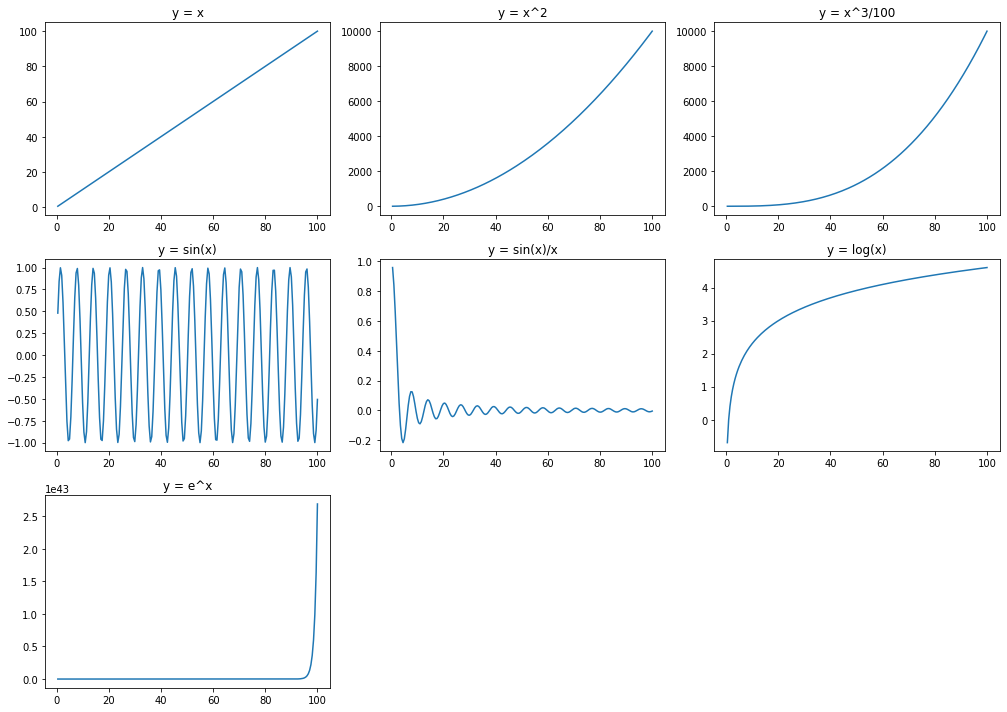

In [154]:
import matplotlib.pyplot as plt 
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
def func1(x):
    return x

def func2(x):
    return x**2

def func3(x):
    return x**3 / 100

def func4(x):
    return np.sin(x)

def func5(x):
    return np.sin(x) / x

def func6(x):
    return np.log(x)

def func7(x):
    return np.exp(x)

plt.figure(figsize=(14, 10))
plt.subplot(3, 3, 1)
plt.plot(x, func1(x))
plt.title('y = x')

plt.subplot(3, 3, 2)
plt.plot(x, func2(x))
plt.title('y = x^2')

plt.subplot(3, 3, 3)
plt.plot(x, func3(x))
plt.title('y = x^3/100')

plt.subplot(3, 3, 4)
plt.plot(x, func4(x))
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x, func5(x))
plt.title('y = sin(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x, func6(x))
plt.title('y = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x, func7(x))
plt.title('y = e^x')

plt.tight_layout()
plt.show()


#### 10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [155]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])
column_with_highest_std = df.std().idxmax()
row_with_lowest_mean = df.mean(axis=1).idxmin()

print("Dataframe:")
print(df)
print("Column with the highest standard deviation:", column_with_highest_std)
print("Row with the lowest mean:", row_with_lowest_mean)


Dataframe:
           a         b         c         d         e
0   1.431603  1.087698  1.836331  1.091683  1.697024
1   1.788497  1.149112  1.725480  1.683725  1.585708
2   1.471814  1.278272  1.084627  1.399102  1.126300
3   1.953691  1.367902  1.971971  1.617173  1.356935
4   1.392294  1.489908  1.609822  1.416089  1.853714
5   1.878494  1.154726  1.682235  1.867974  1.394609
6   1.996148  1.152531  1.220636  1.039858  1.895772
7   1.425646  1.261298  1.277713  1.240389  1.071802
8   1.840495  1.180224  1.132446  1.522288  1.483909
9   1.099454  1.318148  1.333043  1.715545  1.127705
10  1.043492  1.880079  1.368552  1.939983  1.805141
11  1.331290  1.277953  1.879052  1.391359  1.221114
12  1.082366  1.456362  1.420598  1.871678  1.888774
13  1.814949  1.132141  1.988197  1.068432  1.428103
14  1.949899  1.777774  1.635227  1.848845  1.404764
15  1.177848  1.042928  1.234500  1.887357  1.800611
16  1.181947  1.730833  1.365399  1.329304  1.775162
17  1.071841  1.364806  1.031403  1

#### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [156]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
count = df[df['g'] == 'LT8'].shape[0]
std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()
print("\nNumber of rows where the value in column 'g' is 'LT8':", count)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_dev_GT8)


Number of rows where the value in column 'g' is 'LT8': 17
Standard deviation of column 'f' for rows where 'g' is 'LT8': 0.5340062892326687
Standard deviation of column 'f' for rows where 'g' is 'GT8': 0.29164123126691627
